In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import string
import re

In [2]:
df = pd.read_csv('Twitter_Data.csv')
stop_words = set(stopwords.words('english'))
positive_freq = Counter()
negative_freq = Counter()


for index, row in df.iterrows():
    tweet = row['tweets']
    label = row['label']
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    url_pattern = r'https?://\S+|www\.\S+'
    processed_sentence = re.sub(url_pattern, '', tweet)
    
    word_tokens = word_tokenize(processed_sentence)
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    if label == 1:
        positive_freq.update(filtered_tweet)
    elif label == -1:
        negative_freq.update(filtered_tweet)




results = []
for index, row in df.iterrows():
    tweet = row['tweets']
    label = row['label']
    
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    url_pattern = r'https?://\S+|www\.\S+'
    processed_sentence = re.sub(url_pattern, '', tweet)
    
    word_tokens = word_tokenize(processed_sentence)
    
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    bias = 0 if label == -1 else (1 if label == 1 else -1)
    
    pos_freq_sum = sum(positive_freq[word] for word in filtered_tweet)
    neg_freq_sum = sum(negative_freq[word] for word in filtered_tweet)


    results.append([bias, pos_freq_sum, neg_freq_sum])

print(results)
print("\n")
print(len(results))


print("\n")
print(positive_freq)
print("\n")
print(negative_freq)

[[0, 89654, 45656], [-1, 76315, 37892], [1, 232127, 115701], [1, 82496, 39300], [1, 79559, 38811], [-1, 503, 301], [-1, 77868, 38085], [-1, 81310, 41006], [1, 99950, 47736], [1, 72956, 36638], [1, 114379, 58676], [1, 91129, 44777], [1, 71022, 35453], [-1, 30367, 13140], [-1, 25676, 11177], [0, 95733, 46563], [-1, 76228, 38034], [-1, 19689, 8810], [1, 95777, 43569], [0, 101917, 51790], [1, 178652, 88860], [0, 90510, 43835], [-1, 2426, 1275], [0, 84801, 41360], [0, 78735, 39966], [1, 106717, 49950], [-1, 100024, 48402], [-1, 75413, 37670], [-1, 220124, 109463], [-1, 2389, 1293], [1, 92685, 44536], [-1, 24380, 10773], [0, 103848, 50704], [1, 12065, 6113], [0, 89427, 44732], [-1, 70440, 35226], [1, 2905, 1018], [1, 25022, 11007], [0, 112334, 54764], [0, 82418, 42620], [1, 1594, 712], [-1, 76927, 38802], [-1, 99200, 48282], [1, 15769, 5699], [1, 22065, 10030], [1, 95392, 48733], [1, 196604, 94135], [-1, 1859, 837], [1, 94858, 46599], [0, 96630, 45035], [1, 10956, 5135], [-1, 89593, 43214], 

In [3]:
feature = []
nature = []
for i in results:
    tmp=[]
    tmp.append(i[1]/10000)
    tmp.append(i[2]/10000)
    
    # tmp.append(i[1]/10)
    # tmp.append(i[2]/10)
    
    feature.append(tmp)
    nature.append(i[0])

nature = [1 if element == 1 else 0 for element in nature]

X_train = np.array(feature)
y_train = np.array(nature)


# print(X_train)
print(len(X_train))

# print(y_train)
print(len(y_train))


162978
162978


In [4]:
def sigmoid(z):

    g = 1/(1+np.exp(-z))
 
    return g

In [5]:
def compute_cost(X, y, w, b):
    m, n = X.shape
    cost=0.0
    for i in range (m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    total_cost = cost / m
    return total_cost

In [6]:
def compute_gradient(X, y, w, b): 

    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i  in range(m):
        f_wb_i=sigmoid(np.dot(X[i],w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err_i*X[i,j]
        dj_db=dj_db + err_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_db, dj_dw

In [7]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 

    m = len(X)

    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              

        if i<100000:  
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

In [11]:
initial_w = np.zeros(2)
initial_b = 0

iterations = 1000
alpha = 0.01

w,b, J_history, w_history = gradient_descent(X_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b:0.2f},{w} ")

Iteration    0: Cost     0.69   
Iteration  100: Cost     0.69   
Iteration  200: Cost     0.69   
Iteration  300: Cost     0.69   
Iteration  400: Cost     0.69   
Iteration  500: Cost     0.68   
Iteration  600: Cost     0.68   
Iteration  700: Cost     0.68   
Iteration  800: Cost     0.68   
Iteration  900: Cost     0.68   
Iteration  999: Cost     0.68   
b,w found by gradient descent: -0.24,[ 0.11903913 -0.22142116] 


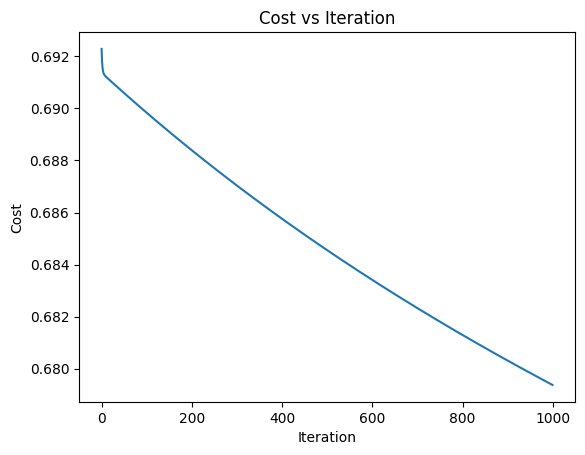

In [12]:
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

In [13]:
initial_w = np.zeros(2)
initial_b = 0

iterations = 10000
alpha = 0.1

w,b, J_history, w_history = gradient_descent(X_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b:0.2f},{w} ")

Iteration    0: Cost     0.70   
Iteration 1000: Cost     0.93   
Iteration 2000: Cost     0.86   
Iteration 3000: Cost     0.80   
Iteration 4000: Cost     0.76   
Iteration 5000: Cost     0.73   
Iteration 6000: Cost     0.71   
Iteration 7000: Cost     0.70   
Iteration 8000: Cost     0.69   
Iteration 9000: Cost     0.68   
Iteration 9999: Cost     0.67   
b,w found by gradient descent: -0.76,[ 3.72250606 -7.2154522 ] 


In [14]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i] = f_wb >= 0.5
    return p

In [15]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 61.662924


In [18]:
s=input("Enter the sentence :")
i=s
total_word=[]

net_res=[]
i = i.translate(str.maketrans('', '', string.punctuation))
url_pattern = r'https?://\S+|www\.\S+'
processed_sentence = re.sub(url_pattern, '', i)
    
word_tokens = word_tokenize(processed_sentence)
filtered_tweet = [a for a in word_tokens if not a in stop_words]

pos=0
neg=0
for j in filtered_tweet:
    if j in positive_freq:
        pos = pos + positive_freq[j]
    if j in negative_freq:
        neg = neg + negative_freq[j]

mat = np.array([pos,neg])

f= sigmoid(np.dot(mat,w)+b)

if f>= 0.4:
    print("Positive")
else:
    print("Negative")


Enter the sentence : what the hell is this


Negative
